In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer



In [5]:
# Ensure necessary NLTK downloads
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# Load the dataset with proper encoding
df = pd.read_csv(r"C:\Users\Nisha\OneDrive\Desktop\MAIN FILE.csv", encoding="ISO-8859-1")



In [11]:
# Extract column 21 (adjust index if needed)
column_index = 20  # Column index starts from 0
column_name = df.columns[column_index]
text_data = df[column_name].dropna().astype(str)  # Drop NaN values and ensure strings



In [13]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    return text.lower().strip()  # Convert to lowercase



In [15]:
# Apply text cleaning
text_data_cleaned = text_data.apply(clean_text)



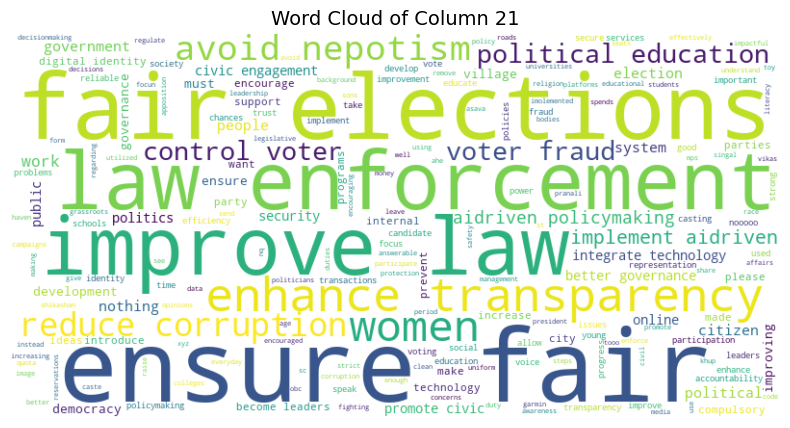

In [17]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(text_data_cleaned))

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Column 21", fontsize=14)
plt.show()



In [19]:
# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each sentence
sentiment_df = text_data_cleaned.apply(lambda text: sia.polarity_scores(text))
sentiment_df = pd.DataFrame(list(sentiment_df))
sentiment_df['text'] = text_data_cleaned.values  # Add original text back

# Categorize sentiment
sentiment_df['sentiment_label'] = sentiment_df['compound'].apply(
    lambda score: "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"
)

# Display results
print(sentiment_df[['text', 'sentiment_label', 'compound']])

                                                  text sentiment_label  \
0                        promote clean image candidate        Positive   
1    vote casting should be made compulsory in each...         Neutral   
2    avoid the race of seats and focus on important...        Negative   
3                                                              Neutral   
4                       we have to remove reservations         Neutral   
..                                                 ...             ...   
412                                                 no        Negative   
413                                  compalsary voting         Neutral   
414                                                 no        Negative   
415                                                 no        Negative   
416  encourage young people to take an active role ...        Positive   

     compound  
0      0.6486  
1      0.0000  
2     -0.1027  
3      0.0000  
4      0.0000  
..        ...  

The word cloud shows that people want fair elections, strict law enforcement, and more transparency in the political system. Many are concerned about corruption, voter fraud, and nepotism and believe that strong laws can help fix these issues. There is also interest in using technology and AI to improve elections and prevent fraud. People think better education and civic awareness can help citizens make informed decisions. Overall, the message is clear: people want a fair, honest, and modern political system that works for everyone.